#  Support Vector Machine

## Digit Recognition

#### Problem Statement:
Let's now tackle a slightly more complex problem - letter recognition. We'll first explore the dataset a bit, prepare it (scale etc.) and then experiment with linear and non-linear SVMs with various hyperparameters.

A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.


#### Objective:
The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image. 

You are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem. 


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

## Step 1: Reading and Understanding the Data

##### A. Importing Csv File

In [3]:
# dataset
digits = pd.read_csv("train.csv")
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### B. Inspect the various aspects of the digits dataframe

In [4]:
digits.shape

(42000, 785)

In [5]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Step 2: Data Analysis

##### A. Lets check different labels 

In [7]:
digit_list = list(np.sort(digits['label'].unique()))
print(digit_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


##### B. Check Column wise null value 

In [8]:
# Find column wise null value and then sort to descending
digits.isnull().sum(axis=0).sort_values(ascending=False).head(10)

pixel783    0
pixel267    0
pixel265    0
pixel264    0
pixel263    0
pixel262    0
pixel261    0
pixel260    0
pixel259    0
pixel258    0
dtype: int64

##### C. Check Column wise null value 

In [9]:
# Find row wise null value and then sort to descending
digits.isnull().sum(axis=1).sort_values(ascending=False).head(10)

41999    0
14005    0
14003    0
14002    0
14001    0
14000    0
13999    0
13998    0
13997    0
13996    0
dtype: int64

From the Above, it can be seen that There is no column or row having null value

##### D. Check Label wise Count

In [10]:
# Check label wise count
digits['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

##### E Check Average Feature Value

In [11]:
round(digits.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.01
pixel14     0.01
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.01
pixel762    0.04
pixel763    0.08
pixel764    0.11
pixel765    0.18
pixel766    0.30
pixel767    0.41
pixel768    0.51
pixel769    0.56
pixel770    0.68
pixel771    0.60
pixel772    0.49
pixel773    0.34
pixel774    0.22
pixel775    0.12
pixel776    0.06
pixel777    0.02
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

## Step 3: Data Visualization

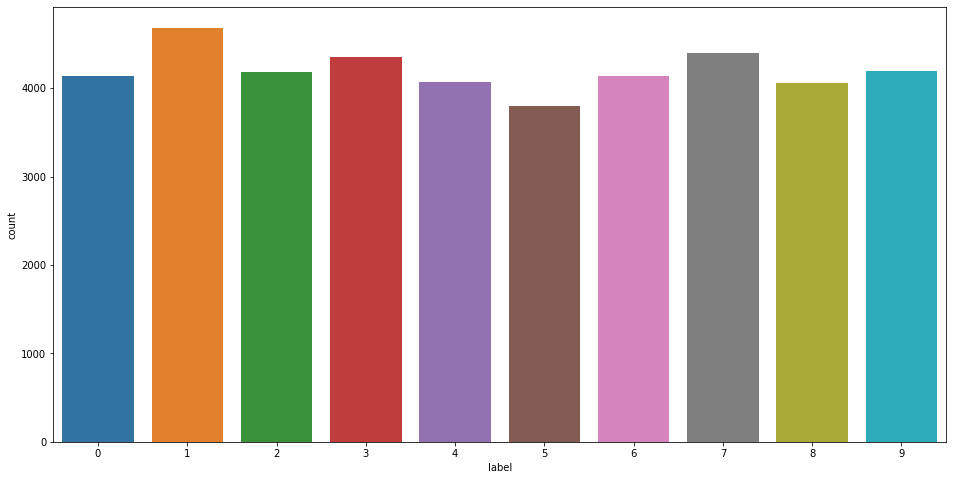

In [12]:
# basic plots: How do various attributes vary with the letters

plt.figure(figsize=(16, 8))
sns.countplot(digits.label)

## Step 4. Scaling the features

##### A.Dividing Train Data into X and Y sets for the model building

In [13]:
# splitting into X and y
X = digits.drop("label", axis = 1)
y = digits['label']

##### B. Scaling 

In [14]:
# scaling the features
X = scale(X)

## Step 5. Splitting the Data into Training and Testing Sets

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2,test_size = 0.8, random_state = 101)

In [16]:
print(X_train.shape)
print(X_test.shape)

(8400, 784)
(33600, 784)


## Step 6. Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

### 1. Linear Model

##### A. Building Linear Model

In [17]:
# Building a linear model
model_linear = SVC(kernel='linear')

# fit the data
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

##### B. Checking its accuracy & Confusion Martix

In [18]:
# confusion matrix and accuracy

# accuracy
print("Accuracy of Linear Model :- ", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred), "\n")

Accuracy of Linear Model :-  0.913125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]] 



##### C. Checking Class Wise Accuracy (Classification  Report)

In [19]:
# Classification Report
digit_list=['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=digit_list))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3285
           1       0.95      0.98      0.97      3760
           2       0.90      0.91      0.90      3343
           3       0.89      0.88      0.88      3475
           4       0.88      0.93      0.91      3290
           5       0.87      0.86      0.87      3039
           6       0.95      0.95      0.95      3277
           7       0.92      0.92      0.92      3504
           8       0.91      0.87      0.89      3272
           9       0.90      0.86      0.88      3355

    accuracy                           0.91     33600
   macro avg       0.91      0.91      0.91     33600
weighted avg       0.91      0.91      0.91     33600



##### D. Analysis Of Linear Model

1. Accuracy:- The linear model gives approx. 91% accuracy which is quite good   
2. Classification Report :- The Class wise Precision , Recall & F1-score of the model is also quite good

### 2. Non Linear Model -RBF

##### A. Building Non Linear Model

In [20]:
# Building a rbf model
model_rbf = SVC(kernel='rbf')

# fit the data
model_rbf.fit(X_train, y_train)

# predict
y_pred = model_rbf.predict(X_test)

##### B. Checking  accuracy & Confusion Martix

In [21]:
# confusion matrix and accuracy

# accuracy
print("Accuracy of RBF Model :- ", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy of RBF Model :-  0.9396428571428571 

[[3195    0   19    5    4   11   32    4   14    1]
 [   0 3689   23   12    8    3    7    6    8    4]
 [  15   15 3144   29   31    5   18   37   43    6]
 [   5    8   92 3191    5   73    6   31   43   21]
 [   3    7   57    1 3099    9   19   21    7   67]
 [  15   10   37   66   16 2776   53   15   32   19]
 [  19    5   46    1   12   31 3149    2   12    0]
 [   6   21   66   11   25    3    0 3285    3   84]
 [  14   24   40   63   14   62   22   19 2996   18]
 [  12   10   38   40   80    6    0   97   24 3048]]


##### C. Checking Class Wise Accuracy (Classification  Report)

In [22]:
# Classification Report
digit_list=['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=digit_list))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3285
           1       0.97      0.98      0.98      3760
           2       0.88      0.94      0.91      3343
           3       0.93      0.92      0.93      3475
           4       0.94      0.94      0.94      3290
           5       0.93      0.91      0.92      3039
           6       0.95      0.96      0.96      3277
           7       0.93      0.94      0.94      3504
           8       0.94      0.92      0.93      3272
           9       0.93      0.91      0.92      3355

    accuracy                           0.94     33600
   macro avg       0.94      0.94      0.94     33600
weighted avg       0.94      0.94      0.94     33600



##### D. Analysis Of Non Linear RBF Model

1. Accuracy:- The non linear RBF model gives approx. 94% accuracy which is more than linear model     
2. Classification Report :- The Class wise Precision , Recall & F1-score of the model is also quite good

### 3. Non Linear Model - Poly

##### A. Building  Model 

In [23]:
# Buikding a poly model
model_poly = SVC(kernel='poly')

# fit the data
model_poly.fit(X_train, y_train)

# predict
y_pred = model_poly.predict(X_test)

##### B. Checking  accuracy & Confusion Martix

In [24]:
# confusion matrix and accuracy

# accuracy
print("Accuracy of Polynomial Model :- ", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy of Polynomial Model :-  0.87125 

[[2893    0    8    3   38   13   28    0  299    3]
 [   1 3684   11    1   12    0    6    0   43    2]
 [  14   18 2489   37  153    1   11   19  588   13]
 [   0   16   24 2846   27   36    3   13  464   46]
 [   3    8   15    0 3080    8    3    5   17  151]
 [   6    1    5   72   73 2358   30    7  442   45]
 [  16    9   10    0  108   43 2901    2  188    0]
 [   1   41    7    7  138    1    0 2862  105  342]
 [   2   16    6   30   20   40    1    4 3131   22]
 [   6   14    1   13  153    8    0   42   88 3030]]


##### C. Checking Class Wise Accuracy (Classification  Report)

In [25]:
# Classification Report
digit_list=['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=digit_list))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      3285
           1       0.97      0.98      0.97      3760
           2       0.97      0.74      0.84      3343
           3       0.95      0.82      0.88      3475
           4       0.81      0.94      0.87      3290
           5       0.94      0.78      0.85      3039
           6       0.97      0.89      0.93      3277
           7       0.97      0.82      0.89      3504
           8       0.58      0.96      0.73      3272
           9       0.83      0.90      0.86      3355

    accuracy                           0.87     33600
   macro avg       0.90      0.87      0.87     33600
weighted avg       0.90      0.87      0.88     33600



##### D. Analysis Of Non Linear Poly Model

1. Accuracy:- The linear model gives approx. 87% accuracy which is least among three model     
2. Classification Report :- The Class wise Precision , Recall & F1-score of the model however is not good for this model

### Selection Of Best Model

The accuracy of `RBF` model highest(approx 94%).   
The Class wise accuracy of RBF mode is quite good.  
So let's Proceed further with RBF Model 

## Step 7.  Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [26]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.001, 0.0001, 0.00001],'C': [1,10, 100,1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 23.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 1e-05]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [27]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,40.2872,2.314094,10.4162,1.008093,1,0.001,"{'C': 1, 'gamma': 0.001}",0.935119,0.926786,0.935119,...,0.930833,0.004216,4,0.972321,0.971429,0.971429,0.972173,0.973214,0.972113,0.000663
1,55.6362,2.437124,14.1348,0.658217,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910119,0.905952,0.907738,...,0.903095,0.006075,11,0.916518,0.917708,0.916518,0.921577,0.919940,0.918452,0.002001
2,143.9206,6.929047,22.3772,1.930128,1,1e-05,"{'C': 1, 'gamma': 1e-05}",0.752381,0.729167,0.747619,...,0.739643,0.009008,12,0.756399,0.743006,0.742560,0.761756,0.743750,0.749494,0.008015
3,31.7834,1.735774,8.9192,0.264649,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941071,0.938690,0.945833,...,0.939405,0.003865,1,0.999405,0.999554,0.999405,0.999107,0.999256,0.999345,0.000152
4,23.8830,0.414339,7.9706,0.173418,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.933929,0.923214,0.931548,...,0.927262,0.004678,5,0.957887,0.959970,0.959375,0.957738,0.959077,0.958810,0.000865
5,50.6468,0.804056,12.8498,0.428871,10,1e-05,"{'C': 10, 'gamma': 1e-05}",0.911905,0.908929,0.908929,...,0.904405,0.006907,10,0.916071,0.916518,0.916220,0.921429,0.919196,0.917887,0.002107
6,30.8674,1.079181,8.6814,0.142232,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939881,0.936905,0.946429,...,0.939286,0.003783,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,17.7658,0.258035,6.6788,0.142491,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929762,0.923810,0.925595,...,0.925595,0.003409,7,0.994345,0.994494,0.994940,0.993006,0.994196,0.994196,0.000645
8,22.3848,0.283785,7.9276,0.114544,100,1e-05,"{'C': 100, 'gamma': 1e-05}",0.930357,0.923214,0.929762,...,0.926667,0.002877,6,0.954911,0.956399,0.955208,0.954911,0.956548,0.955595,0.000727
9,30.5376,0.250843,8.7448,0.219326,1000,0.001,"{'C': 1000, 'gamma': 0.001}",0.939881,0.936905,0.946429,...,0.939286,0.003783,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


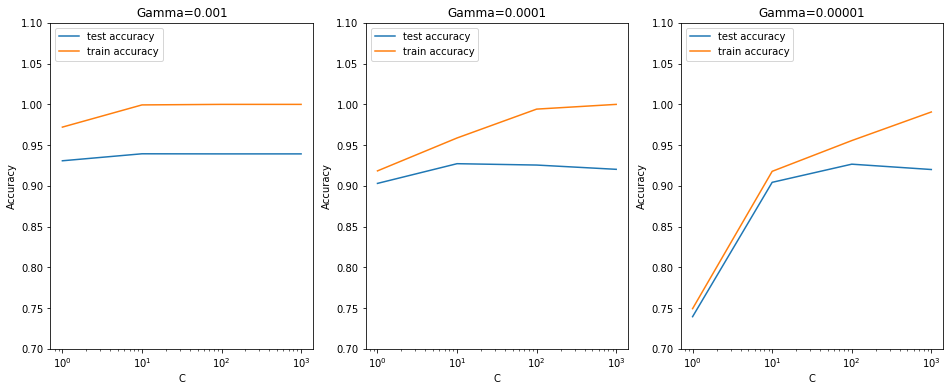

In [28]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.70, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 2/3
plt.subplot(132)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.70, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.00001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.00001")
plt.ylim([0.70, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


##### Graph Analysis  
From the above graph it can be observed that SVC model with C=10 & gamma= 0.001 have best accuracy

Let's now choose the best hyperparameters. 

In [29]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9394047619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


## Step 8.  Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [30]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
# metrics for Final Model
print("Accuracy for Final Model", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

Accuracy for Final Model 0.9477083333333334 

[[3211    0   19    2    2   12   26    3    8    2]
 [   0 3692   26    9    6    3    5    9    7    3]
 [  13   12 3165   29   29    6   20   40   21    8]
 [   4    5   77 3232    4   79    1   23   31   19]
 [   5    8   42    1 3117    5   20   19    9   64]
 [  15    8   33   61   15 2815   35   11   31   15]
 [  19    5   44    1   12   18 3167    1   10    0]
 [   5   17   52   12   29    4    1 3322    4   58]
 [   7   16   42   53   15   51   18   16 3044   10]
 [   9    9   33   20   81   10    0   94   21 3078]] 



In [32]:
# Classification Report for Final Model
digit_list=['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=digit_list))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3285
           1       0.98      0.98      0.98      3760
           2       0.90      0.95      0.92      3343
           3       0.95      0.93      0.94      3475
           4       0.94      0.95      0.94      3290
           5       0.94      0.93      0.93      3039
           6       0.96      0.97      0.96      3277
           7       0.94      0.95      0.94      3504
           8       0.96      0.93      0.94      3272
           9       0.95      0.92      0.93      3355

    accuracy                           0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



## Conclusion

The accuracy achieved using a `non-linear RBF`  kernel (~0.95) is much higher than that of a linear one (~0.91)
The Classification Report shows that the class wise accuracy , precision , recall & f1score of this model is also good

## Final Model

The `non-linear RBF` model  with C=10 and gamma = 0.001 is best for our data 

## Step 9. Making Predictions

##### A. Importing the Test dataset

In [33]:
# dataset
digits_test = pd.read_csv("test.csv")

##### B. Lets Ckeck Column for Test Dataset

In [34]:
digits_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### C. Scaling the test data

In [35]:
digits_test=scale(digits_test)

##### D. Making Prediction the test data

In [36]:
y_pred = model.predict(digits_test)

In [37]:
y_pred_df=pd.DataFrame(y_pred)

In [38]:
y_pred_df

,0
0,2
1,0
2,9
3,4
4,3
5,7
6,0
7,3
8,0
9,3
